In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

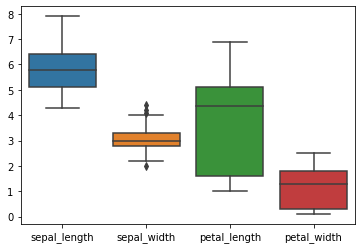

In [6]:
sns.boxplot(data=df);

In [7]:
from sklearn.preprocessing import OrdinalEncoder
od=OrdinalEncoder()
df["species"]=od.fit_transform(df[["species"]])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
q1=np.quantile(df["sepal_width"],0.25)
q3=np.quantile(df["sepal_width"],0.75)
iqr=q3-q1
uw=q3+1.5*iqr
lw=q1-1.5*iqr
index=df['sepal_width'][(df['sepal_width']>uw)|(df['sepal_width']<lw)].index
df.drop(index,inplace=True)

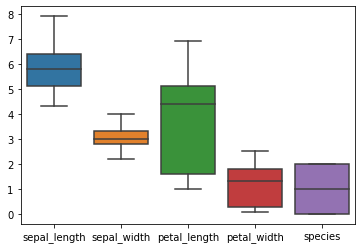

In [9]:
sns.boxplot(data=df);

In [10]:
x=df.iloc[:,0:4]
y=df["species"]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 146, dtype: float64

In [11]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
x["sepal_length"].skew()

0.27841730000040843

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [17]:
ypred=knn.predict(xtest)

In [18]:
print(ypred)

[2. 2. 1. 1. 2. 1. 2. 2. 0. 1. 0. 0. 1. 0. 2. 0. 2. 0. 2. 0. 1. 1. 0. 2.
 1. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 2. 0. 0. 1. 1. 1. 2. 0.]


In [19]:
print(ytest)

102    2.0
70     1.0
56     1.0
79     1.0
125    2.0
78     1.0
123    2.0
132    2.0
47     0.0
62     1.0
5      0.0
17     0.0
94     1.0
14     0.0
101    2.0
36     0.0
131    2.0
30     0.0
134    2.0
38     0.0
77     1.0
87     1.0
34     0.0
126    2.0
51     1.0
20     0.0
145    2.0
120    2.0
96     1.0
82     1.0
128    2.0
54     1.0
45     0.0
112    2.0
29     0.0
43     0.0
108    2.0
48     0.0
18     0.0
73     1.0
81     1.0
57     1.0
114    2.0
19     0.0
Name: species, dtype: float64


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(ac)
print(cm)
print(cr)

0.9772727272727273
[[15  0  0]
 [ 0 14  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      0.93      0.97        15
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



# USING LOGISTIC REGRESSION ON IRIS

In [21]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac= accuracy_score(ytest, ypred)
cm= confusion_matrix(ytest, ypred)
cr= classification_report(ytest, ypred)

print(f"Accuracy  : {ac}\n{cm}\n\n{cr}")

Accuracy  : 0.9545454545454546
[[15  0  0]
 [ 0 13  2]
 [ 0  0 14]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      0.87      0.93        15
         2.0       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.95        44
weighted avg       0.96      0.95      0.95        44



In [23]:
from sklearn.metrics import accuracy_score
ac= accuracy_score(ytest, ypred)
print(ac)

0.9545454545454546


In [ ]:
train=logreg.score(train)